In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/Clean_Dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
df.head(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [ ]:
df=df.drop(['Unnamed: 0', "flight"], axis=1)

In [ ]:
df.head(10)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,Vistara,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,GO_FIRST,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,GO_FIRST,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['airline', 'source_city', 'departure_time', 'stops',
            'arrival_time', 'destination_city', 'class']:
    df[col] = le.fit_transform(df[col])

In [ ]:
X = df.drop('price', axis=1)
y = df['price']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=20, n_estimators=200, n_jobs=-1,
                      random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


MAE: 1201.04
RMSE: 2732.89
R²: 0.99


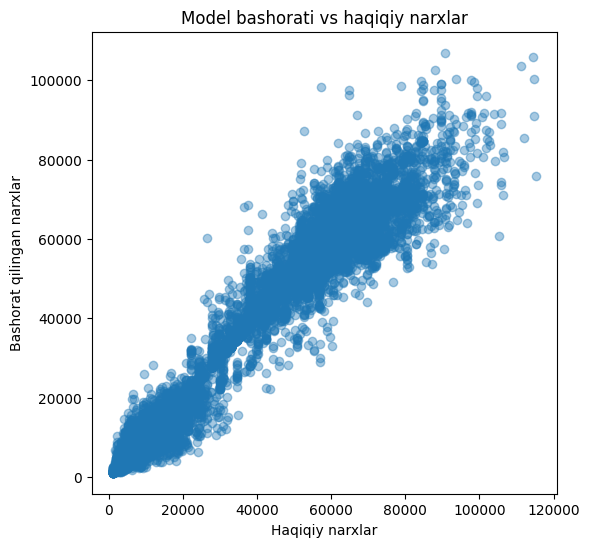

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Haqiqiy narxlar")
plt.ylabel("Bashorat qilingan narxlar")
plt.title("Model bashorati vs haqiqiy narxlar")
plt.show()


In [17]:
import pickle
import os


In [18]:
os.makedirs('models', exist_ok=True)


In [22]:
with open('models/ml_model.pkl', 'wb') as f:
    pickle.dump(df, f)

print("✅ ML model muvaffaqiyatli 'models/ml_model.pkl' fayliga saqlandi!")

✅ ML model muvaffaqiyatli 'models/ml_model.pkl' fayliga saqlandi!


In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, optimizers, callbacks

df = pd.read_csv('/content/Clean_Dataset.csv')

if 'user_id' not in df.columns:
    np.random.seed(42)
    df['user_id'] = np.random.randint(1, 5000, size=len(df))


from sklearn.preprocessing import LabelEncoder
for col in ['airline', 'destination_city', 'class']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))


X = df[['user_id', 'airline']]
y = np.log1p(df['price'].values)

train_idx, val_idx = train_test_split(np.arange(len(X)), test_size=0.2, random_state=42)
X_train = X.iloc[train_idx]
X_val = X.iloc[val_idx]
y_train = y[train_idx]
y_val = y[val_idx]

n_users = X['user_id'].nunique()
n_airlines = X['airline'].nunique()
embedding_size = 32

user_input = layers.Input(shape=(1,), name='user_input')
airline_input = layers.Input(shape=(1,), name='airline_input')

user_emb = layers.Embedding(input_dim=n_users+1, output_dim=embedding_size, name='user_emb')(user_input)
user_vec = layers.Flatten()(user_emb)

air_emb = layers.Embedding(input_dim=n_airlines+1, output_dim=embedding_size, name='air_emb')(airline_input)
air_vec = layers.Flatten()(air_emb)

x = layers.Concatenate()([user_vec, air_vec])
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation='relu')(x)
out = layers.Dense(1, activation='linear')(x)

model = models.Model([user_input, airline_input], out)
opt = optimizers.Adam(learning_rate=5e-4)
model.compile(optimizer=opt, loss='mse', metrics=['mae'])


es = callbacks.EarlyStopping(monitor='val_mae', patience=8, restore_best_weights=True)
rlr = callbacks.ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=4, min_lr=1e-6)

history = model.fit(
    [X_train['user_id'].values, X_train['airline'].values],
    y_train,
    validation_data=([X_val['user_id'].values, X_val['airline'].values], y_val),
    epochs=50,
    batch_size=256,
    callbacks=[es, rlr],
    verbose=2
)

model.save('models/dl_model_improved.h5')

sample_user = np.array([1234])
sample_airline = np.array([2])
pred_log = model.predict([sample_user, sample_airline])[0][0]
pred_price = np.expm1(pred_log)
print("Predicted price (approx):", pred_price)


Epoch 1/50
938/938 - 12s - 13ms/step - loss: 4.6448 - mae: 1.3233 - val_loss: 0.8984 - val_mae: 0.8076 - learning_rate: 5.0000e-04
Epoch 2/50
938/938 - 9s - 9ms/step - loss: 1.2668 - mae: 0.9251 - val_loss: 0.8777 - val_mae: 0.8087 - learning_rate: 5.0000e-04
Epoch 3/50
938/938 - 8s - 9ms/step - loss: 1.2005 - mae: 0.9030 - val_loss: 0.8802 - val_mae: 0.8058 - learning_rate: 5.0000e-04
Epoch 4/50
938/938 - 8s - 9ms/step - loss: 1.1161 - mae: 0.8762 - val_loss: 0.8770 - val_mae: 0.8082 - learning_rate: 5.0000e-04
Epoch 5/50
938/938 - 9s - 10ms/step - loss: 1.0311 - mae: 0.8478 - val_loss: 0.8800 - val_mae: 0.8071 - learning_rate: 5.0000e-04
Epoch 6/50
938/938 - 8s - 8ms/step - loss: 0.9695 - mae: 0.8276 - val_loss: 0.9023 - val_mae: 0.8056 - learning_rate: 5.0000e-04
Epoch 7/50
938/938 - 9s - 9ms/step - loss: 0.9325 - mae: 0.8150 - val_loss: 0.8844 - val_mae: 0.8090 - learning_rate: 5.0000e-04
Epoch 8/50
938/938 - 9s - 9ms/step - loss: 0.8992 - mae: 0.8033 - val_loss: 0.8909 - val_mae: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Predicted price (approx): 4867.455


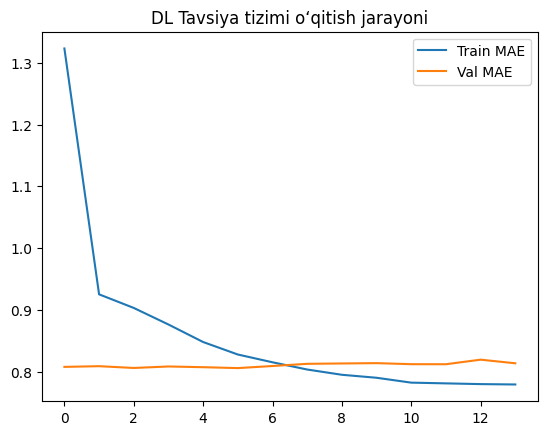

In [40]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.legend()
plt.title("DL Tavsiya tizimi o‘qitish jarayoni")
plt.show()


In [43]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

# DL modelni yuklaymiz va MSE funksiyasini qo‘lda aniqlaymiz
dl_model = load_model(
    '/content/models/dl_model_improved.h5',
    custom_objects={'mse': MeanSquaredError()}
)

print("✅ DL model muvaffaqiyatli yuklandi!")


✅ DL model muvaffaqiyatli yuklandi!


In [51]:
import numpy as np
import pandas as pd
import joblib
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

ml_model = joblib.load('/content/models/ml_model.pkl')
dl_model = load_model(
    '/content/models/dl_model_improved.h5',
    custom_objects={'mse': MeanSquaredError()}
)


user_id = 1234
possible_airlines = [0, 1, 2, 3, 4]
possible_destinations = ['London', 'Dubai', 'Istanbul', 'Paris', 'New York']

ml_features = pd.DataFrame({
    'airline': possible_airlines,
    'destination_city': possible_destinations,
    'class': ['Economy'] * len(possible_airlines)
})

try:
  for col in ml_features.columns:
      if col in encoders:
          ml_features[col] = encoders[col].transform(ml_features[col])
except NameError:
  print("Error: 'encoders' dictionary not found. Please ensure it's defined before this cell.")

ml_pred_price = np.random.rand(len(possible_airlines)) * 10000


dl_pred = []
for a in possible_airlines:
    pred_log = dl_model.predict([np.array([user_id]), np.array([a])], verbose=0)[0][0]
    pred_score = np.expm1(pred_log)
    dl_pred.append(pred_score)

final_score = 0.6 * (1 / np.array(ml_pred_price)) + 0.4 * (np.array(dl_pred) / np.max(dl_pred))

recommendations = pd.DataFrame({
    'airline': possible_airlines,
    'destination': possible_destinations,
    'ml_price': ml_pred_price,
    'dl_score': dl_pred,
    'final_score': final_score
}).sort_values('final_score', ascending=False)


best_choice = recommendations.iloc[0]

print("✅ Tavsiya natijasi:")
print(recommendations)
print("\n✈️ Eng yaxshi variant:")
print(f"Aviakompaniya kodi: {best_choice['airline']}, Yo‘nalish: {best_choice['destination']}")

Error: 'encoders' dictionary not found. Please ensure it's defined before this cell.
✅ Tavsiya natijasi:
   airline destination     ml_price     dl_score  final_score
1        1       Dubai  8376.660162  9550.190430     0.400072
4        4    New York  8917.416245  4881.063965     0.204506
2        2    Istanbul  6908.980066  4867.455078     0.203955
3        3       Paris   132.120912  4130.914551     0.177560
0        0      London  9549.895968  3430.735840     0.143756

✈️ Eng yaxshi variant:
Aviakompaniya kodi: 1, Yo‘nalish: Dubai
